In [1]:
from elasticsearch import Elasticsearch

INDEX = "judgements"
DOC_TYPE = "judgement"

es = Elasticsearch()

## Count doucments

In [9]:
all_judgements_count = es.search(index = INDEX, doc_type = DOC_TYPE)
print("All judgments in 2015: ", all_judgements_count['hits']['total'])

All judgments in 2015:  56081


## Judgements in 2015 contains word 'szkoda':

### REGEX result:  17767

In [16]:
word = "szkoda"
judgments_contains_word = es.search(index = INDEX, doc_type = DOC_TYPE, body={
  "query": {
    "query_string" : {
            "fields" : ["content"],
            "query" : "szkoda"
        }
  }
})

# print(judgments_contains_word)
print("Judgements in 2015 contains word 'szkoda':", judgments_contains_word['hits']['total'])

Judgements in 2015 contains word 'szkoda': 17926


## Judgements in 2015 contains phrase "trwały uszczerbek na zdrowiu":

In [19]:
phrase = "trwały uszczerbek na zdrowiu"
judgments_contains_phrase = es.search(index = INDEX, doc_type = DOC_TYPE, body={
  "query" : {
        "match_phrase": {
            "content": phrase
        }
    }
})

# print(judgments_contains_phrase)
print("Judgements in 2015 contains phrase 'trwaly uszczerbek na zdrowiu':", judgments_contains_phrase['hits']['total'])

Judgements in 2015 contains phrase 'trwaly uszczerbek na zdrowiu': 1499


## Find 3 judges in 2015 with the biggest number of judgements

In [11]:
INDEX2 = "judgements6"
judges_agg = es.search(index = INDEX2, doc_type = DOC_TYPE, body={
  "aggs" : {
        "judges" : {
            "terms" : { 
                "field" : "judges.judge",
                "size": 3
            }
        }
    }
})

print("3 judges with biggest number of judgements:")
for bucket in judges_agg['aggregations']['judges']['buckets']:
    print(bucket['key'], ": ", bucket['doc_count'])

3 judges with biggest number of judgements:
Roman Troll :  375
Katarzyna Antoniak :  346
Elżbieta Wojtczuk :  311


## Judgements in months histogram

In [9]:
judgements_agg = es.search(index = INDEX, doc_type = DOC_TYPE, body={
  "aggs" : {
        "judgements_over_months" : {
            "date_histogram" : {
                "field" : "date",
                "interval" : "month"
            }
        }
    }
})

#  judges with biggest number of judgements:")
values = []
for bucket in judgements_agg['aggregations']['judgements_over_months']['buckets']:
    if "2015" in bucket['key_as_string']:
        values.append(bucket['doc_count'])
print(values)

[3854, 4293, 5001, 4656, 4492, 5066, 3472, 2649, 5108, 6632, 5548, 6108]


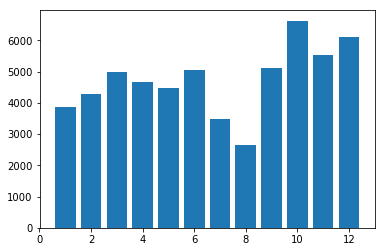

In [10]:
months = [x for x in range(1,13)]

import pylab as plt

plt.bar(months, values, align='center')
plt.show()